In [1]:
# ngram_range = (1,1)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

cv.fit(["Austin Jose looking for a job."])
cv.vocabulary_

{'austin': 0, 'jose': 3, 'looking': 4, 'for': 1, 'job': 2}

In [2]:
# ngram_range = (2,2)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

cv.fit(["Austin Jose looking for a job."])
cv.vocabulary_

{'austin jose': 0, 'jose looking': 2, 'looking for': 3, 'for job': 1}

In [3]:
# ngram_range = (1,3)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))

cv.fit(["Austin Jose looking for a job."])
cv.vocabulary_

{'austin': 0,
 'jose': 6,
 'looking': 9,
 'for': 3,
 'job': 5,
 'austin jose': 1,
 'jose looking': 7,
 'looking for': 10,
 'for job': 4,
 'austin jose looking': 2,
 'jose looking for': 8,
 'looking for job': 11}

In [4]:
corpus = [
    "Sam ate pizza.",
    "Thomas brought 2$ pizza in Dhaka.",
    "Sam is eating pizza."
]

In [5]:
import spacy
# load english language model and create nlp object for it
nlp = spacy.load("en_core_web_sm")

# Create function that will removing stop words,puntuations and returning lemmatizing word
def processing(text):
    doc = nlp(text)
    
    filtered_text = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
            
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [6]:
processing("Thomas brought 2$ pizza in Dhaka.")

'Thomas bring 2 $ pizza Dhaka'

In [7]:
corpus_preocessed = [processing(token) for token in corpus]
corpus_preocessed

['Sam eat pizza', 'Thomas bring 2 $ pizza Dhaka', 'Sam eat pizza']

# New Category Classifier

In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv("news_category_classifier.csv")
df

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...
...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural...,I still think about that Tuesday night dinner ...
6873,WOMEN,Happy Birthday To Us,I remember the morning of my high school gradu...
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I aske..."
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa ..."


In [10]:
df["category"].value_counts()

ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: category, dtype: int64

# To keep it simple, we just use "CRIME", "SCIENCE", "COMEDY", "SPORTS", "POLITICS" and "BUSINESS" category and removing "title" from from dataset

In [11]:
df_crime = df[df["category"]=="CRIME"]
df_science = df[df["category"]=="SCIENCE"]
df_comedy = df[df["category"]=="COMEDY"]
df_sports = df[df["category"]=="SPORTS"]
df_politics = df[df["category"]=="POLITICS"]
df_business = df[df["category"]=="BUSINESS"]

In [12]:
# Concatenate them
new_df = pd.concat([df_crime, df_science, df_comedy, df_sports, df_politics, df_business], axis=0)
new_df

,category,title,body
1883,CRIME,There Were 2 Mass Shootings In Texas Last Week...,"DENTON, Texas ― Amanda Painter sat at the kitc..."
1884,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,"Rachel Dolezal, the former president of NAACP’..."
1885,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",A man is facing criminal charges after threate...
1886,CRIME,2 People Injured In Indiana School Shooting,At least two people have been injured in a sch...
1887,CRIME,Maryland Police Charge 3 Church Leaders With P...,Police in Maryland have charged three church l...
...,...,...,...
1498,BUSINESS,The Store As A Showroom: Having Your Cake And ...,"In 2005, I was shopping for an acoustic piano...."
1499,BUSINESS,Walmart Ditches 'Bulletproof: Black Lives Matt...,Walmart is dropping the online sale of T-shirt...
1500,BUSINESS,American Cities Losing The Most Jobs This Year,The U.S. economy added roughly 2.4 million w...
1501,BUSINESS,American Cities Adding The Most Jobs This Year,The U.S. economy added nearly 2.5 million empl...


In [13]:
new_df["category"].value_counts()

SPORTS      501
POLITICS    501
BUSINESS    501
COMEDY      380
SCIENCE     350
CRIME       300
Name: category, dtype: int64

In [14]:
# Handling Imbalanced dataset
min_samples = 300
balanced_crime = new_df[new_df["category"]=="CRIME"].sample(min_samples, random_state=2023)
balanced_science = new_df[new_df["category"]=="SCIENCE"].sample(min_samples, random_state=2023)
balanced_comedy = new_df[new_df["category"]=="COMEDY"].sample(min_samples, random_state=2023)
balanced_sports = new_df[new_df["category"]=="SPORTS"].sample(min_samples, random_state=2023)
balanced_politics = new_df[new_df["category"]=="POLITICS"].sample(min_samples, random_state=2023)
balanced_business = new_df[new_df["category"]=="BUSINESS"].sample(min_samples, random_state=2023)

In [15]:
# Concatenate them
balanced_df = pd.concat([balanced_crime, balanced_science, balanced_comedy, balanced_sports, balanced_politics, balanced_business], axis=0)
balanced_df

,category,title,body
2006,CRIME,Parkland Shooter's Rifle Magazines Were Etched...,Officials say they found swastikas etched into...
1907,CRIME,Man Who Killed Indian Immigrant Sentenced To L...,"A Kansas man who shot three people in a bar, k..."
2143,CRIME,Cops Explain How To Pull Off A Good Halloween ...,"Everyone loves a good Halloween prank. Well, e..."
2152,CRIME,Utah Cop Who Violently Arrested Nurse Is Fired,The veteran Utah cop who drew national outrage...
2047,CRIME,White Supremacist Charged With Terrorism After...,The FBI has charged a 26-year-old Missouri man...
...,...,...,...
1101,BUSINESS,ESPN President John Skipper Resigns Unexpectedly,ESPN President and Disney Media Networks Co-Ch...
1414,BUSINESS,"If You Have One Of These Toys In Your House, Y...",Sloppy data security practices at a toy compan...
1440,BUSINESS,Judge Blocks $48 Billion Anthem-Cigna Merger,(Reuters) - A federal judge on Wednesday ruled...
1214,BUSINESS,GoDaddy Pulls The Plug On Neo-Nazi Website The...,Web hosting company GoDaddy announced on Sunda...


In [16]:
balanced_df["category"].value_counts()

CRIME       300
SCIENCE     300
COMEDY      300
SPORTS      300
POLITICS    300
BUSINESS    300
Name: category, dtype: int64

In [17]:
# Label encoding
balanced_df["category_num"] = balanced_df["category"].map({
    "CRIME":0,
    "SCIENCE":1,
    "COMEDY":2,
    "SPORTS":3,
    "POLITICS":4,
    "BUSINESS":5
})

In [18]:
balanced_df

,category,title,body,category_num
2006,CRIME,Parkland Shooter's Rifle Magazines Were Etched...,Officials say they found swastikas etched into...,0
1907,CRIME,Man Who Killed Indian Immigrant Sentenced To L...,"A Kansas man who shot three people in a bar, k...",0
2143,CRIME,Cops Explain How To Pull Off A Good Halloween ...,"Everyone loves a good Halloween prank. Well, e...",0
2152,CRIME,Utah Cop Who Violently Arrested Nurse Is Fired,The veteran Utah cop who drew national outrage...,0
2047,CRIME,White Supremacist Charged With Terrorism After...,The FBI has charged a 26-year-old Missouri man...,0
...,...,...,...,...
1101,BUSINESS,ESPN President John Skipper Resigns Unexpectedly,ESPN President and Disney Media Networks Co-Ch...,5
1414,BUSINESS,"If You Have One Of These Toys In Your House, Y...",Sloppy data security practices at a toy compan...,5
1440,BUSINESS,Judge Blocks $48 Billion Anthem-Cigna Merger,(Reuters) - A federal judge on Wednesday ruled...,5
1214,BUSINESS,GoDaddy Pulls The Plug On Neo-Nazi Website The...,Web hosting company GoDaddy announced on Sunda...,5


In [19]:
# Removing "title" column from this dataset
balanced_df = balanced_df.drop(["title"], axis=1)
balanced_df

,category,body,category_num
2006,CRIME,Officials say they found swastikas etched into...,0
1907,CRIME,"A Kansas man who shot three people in a bar, k...",0
2143,CRIME,"Everyone loves a good Halloween prank. Well, e...",0
2152,CRIME,The veteran Utah cop who drew national outrage...,0
2047,CRIME,The FBI has charged a 26-year-old Missouri man...,0
...,...,...,...
1101,BUSINESS,ESPN President and Disney Media Networks Co-Ch...,5
1414,BUSINESS,Sloppy data security practices at a toy compan...,5
1440,BUSINESS,(Reuters) - A federal judge on Wednesday ruled...,5
1214,BUSINESS,Web hosting company GoDaddy announced on Sunda...,5


In [20]:
# Finding missing values
balanced_df.isnull().sum()

category        0
body            3
category_num    0
dtype: int64

In [21]:
# Handling missing values with empty string
balanced_df.fillna(" ",inplace=True)

In [22]:
# Finding missing values
balanced_df.isnull().sum()

category        0
body            0
category_num    0
dtype: int64

In [23]:
# finding duplicates values
balanced_df.duplicated().sum()

3

In [24]:
# Handling duplicates value
balanced_df.drop_duplicates(inplace=True)

In [25]:
# finding duplicates values
balanced_df.duplicated().sum()

0

In [26]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(balanced_df["body"], balanced_df["category_num"], test_size = 0.2, stratify = balanced_df["category_num"])

In [27]:
print(balanced_df["body"].shape, x_train.shape, x_test.shape)

(1797,) (1437,) (360,)


In [28]:
y_test.value_counts()

3    60
1    60
2    60
5    60
4    60
0    60
Name: category_num, dtype: int64

In [29]:
x_train.head()

1838    If you didn't already wish you were a cat, jus...
1034    NEW YORK (Reuters) - U.S. film and TV studio T...
5104      By Sara Chodosh Not every lad can eat four d...
5773    Houston Texans defensive end J.J. Watt has mad...
1520    It’s been a long time coming, but “Sarah Palin...
Name: body, dtype: object

# Using Scikit-Learn Pipeline and ngram_range=(1,1),that is by default value of CountVectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
# x_test prediction
y_pred = clf.predict(x_test)

In [32]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        60
           1       0.95      0.93      0.94        60
           2       0.98      0.68      0.80        60
           3       0.91      0.85      0.88        60
           4       0.75      0.88      0.81        60
           5       0.85      0.97      0.91        60

    accuracy                           0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



<AxesSubplot:>

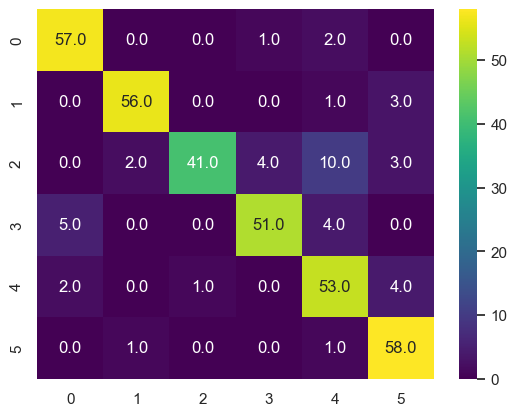

In [33]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="viridis")

In [34]:
x_test[:5]

5390    (Reuters) - Former cycling champion Lance Arms...
5285    As a female chemical engineer, Frances Arnold ...
1585    Special counsel Robert Mueller has a list of q...
1574    Luck was not a lady for these gamblers. On Thu...
1684    “Late Show” host Stephen Colbert said many peo...
Name: body, dtype: object

In [35]:
y_test[:5]

5390    3
5285    1
1585    2
1574    2
1684    2
Name: category_num, dtype: int64

In [36]:
y_pred[:5]

array([4, 1, 2, 2, 2], dtype=int64)

# Using Scikit-Learn Pipeline and ngram_range=(1,2)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1,2))),
    ("nb", MultinomialNB())
])
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [38]:
# x_test prediction
y_pred = clf.predict(x_test)

In [39]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        60
           1       0.98      0.83      0.90        60
           2       1.00      0.15      0.26        60
           3       0.98      0.83      0.90        60
           4       0.52      0.95      0.67        60
           5       0.71      0.97      0.82        60

    accuracy                           0.77       360
   macro avg       0.85      0.77      0.74       360
weighted avg       0.85      0.77      0.74       360



<AxesSubplot:>

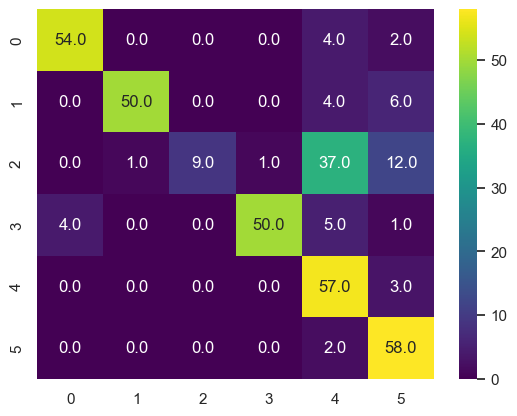

In [40]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="viridis")

In [41]:
x_test[:5]

5390    (Reuters) - Former cycling champion Lance Arms...
5285    As a female chemical engineer, Frances Arnold ...
1585    Special counsel Robert Mueller has a list of q...
1574    Luck was not a lady for these gamblers. On Thu...
1684    “Late Show” host Stephen Colbert said many peo...
Name: body, dtype: object

In [42]:
y_test[:5]

5390    3
5285    1
1585    2
1574    2
1684    2
Name: category_num, dtype: int64

In [43]:
y_pred[:5]

array([4, 1, 2, 2, 4], dtype=int64)

# After Lemmatization the Text

In [44]:
import spacy
# load english language model and create nlp object for it
nlp = spacy.load("en_core_web_sm")

# Create function that will removing stop words,puntuations and returning lemmatizing word
def processing(text):
    doc = nlp(text)
    
    filtered_text = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
            
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [45]:
balanced_df["body_processed"] = balanced_df["body"].apply(processing)
balanced_df

,category,body,category_num,body_processed
2006,CRIME,Officials say they found swastikas etched into...,0,official find swastikas etch Florida high scho...
1907,CRIME,"A Kansas man who shot three people in a bar, k...",0,Kansas man shoot people bar kill engineer Indi...
2143,CRIME,"Everyone loves a good Halloween prank. Well, e...",0,love good Halloween prank victim occasionall...
2152,CRIME,The veteran Utah cop who drew national outrage...,0,veteran Utah cop draw national outrage body ca...
2047,CRIME,The FBI has charged a 26-year-old Missouri man...,0,FBI charge 26 year old Missouri man terrorism ...
...,...,...,...,...
1101,BUSINESS,ESPN President and Disney Media Networks Co-Ch...,5,ESPN President Disney Media Networks Co Chairm...
1414,BUSINESS,Sloppy data security practices at a toy compan...,5,sloppy datum security practice toy company sel...
1440,BUSINESS,(Reuters) - A federal judge on Wednesday ruled...,5,Reuters federal judge Wednesday rule U.S. heal...
1214,BUSINESS,Web hosting company GoDaddy announced on Sunda...,5,web host company GoDaddy announce Sunday neo n...


In [46]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(balanced_df["body_processed"], balanced_df["category_num"], test_size = 0.2, stratify = balanced_df["category_num"])

In [47]:
print(balanced_df["body_processed"].shape, x_train.shape, x_test.shape)

(1797,) (1437,) (360,)


In [48]:
y_test.value_counts()

4    60
2    60
0    60
1    60
3    60
5    60
Name: category_num, dtype: int64

In [49]:
x_train[:5]

5298    HONOLULU south hawaiian island Kauai lie Makau...
5319    dinosaur die ten million year asteroid strike ...
4269    16 state lawmaker resign expel legislature MeT...
1687    Samantha Bee boost car day fact proud Tuesday ...
1813    find piece intentionally mislead comment inten...
Name: body_processed, dtype: object

In [50]:
# Scikit-Learn Pipeline
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [51]:
# x_test prediction
y_pred = clf.predict(x_test)

In [52]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.95      0.90      0.92        60
           2       0.98      0.67      0.79        60
           3       0.91      0.97      0.94        60
           4       0.81      0.93      0.87        60
           5       0.82      0.93      0.87        60

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.88       360
weighted avg       0.89      0.89      0.88       360



<AxesSubplot:>

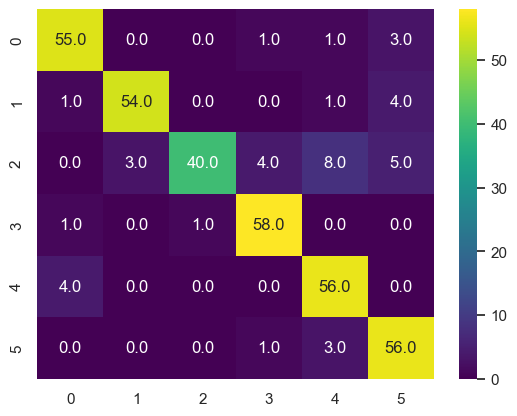

In [53]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="viridis")

In [54]:
x_test[:5]

4040    DUBLIN week Ireland historic vote legalize abo...
1703    President Donald Trump Monday call russian Pre...
1883    DENTON Texas     Amanda Painter sit kitchen ta...
5354    like little blind cavefish squirm way rock res...
5786    Jon Stewart return television Friday night cra...
Name: body_processed, dtype: object

In [55]:
y_test[:5]

4040    4
1703    2
1883    0
5354    1
5786    3
Name: category_num, dtype: int64

In [56]:
y_pred[:5]

array([4, 2, 0, 1, 3], dtype=int64)